## Data Dictionary

| Variable | Definition                                 | Key                                            |
| -------- | ------------------------------------------ | ---------------------------------------------- |
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        | -                                              |
| age      | Age in years                               | -                                              |
| sibsp    | # of siblings / spouses aboard the Titanic | -                                              |
| parch    | # of parents / children aboard the Titanic | -                                              |
| ticket   | Ticket number                              | -                                              |
| fare     | Passenger fare                             | -                                              |
| cabin    | Cabin number                               | -                                              |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="dark", palette=sns.color_palette("Set2"))

titanic = pd.read_csv("./datasets/titanic/train.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Findings

1. Age doesn't have as many values as others, which means it has missing values
2. Embarked seems to be missing 3 values (assumed to be captain and staff)
3. Cabin itself only has 204, which means certain passengers didn't get cabins


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Findings

1. Categorical Values

   - Survived
   - Pclass
   - SibSp
   - Parch

2. Numerical Values
   - Age
   - Fare


<Axes: xlabel='Age', ylabel='Count'>

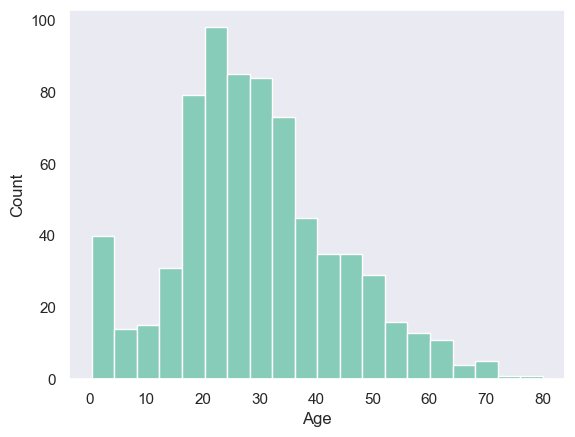

In [5]:
sns.histplot(data=titanic, x="Age")

<Axes: xlabel='Fare', ylabel='Count'>

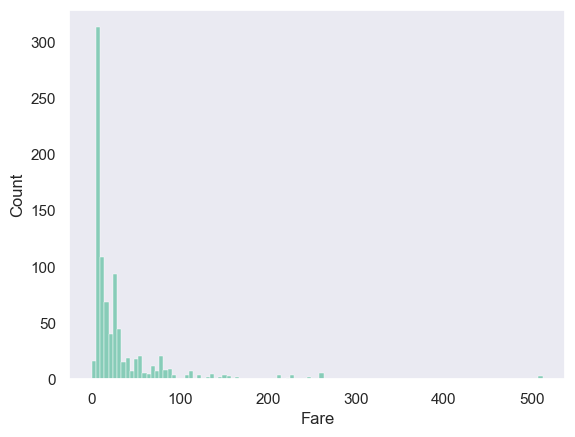

In [6]:
sns.histplot(data=titanic, x="Fare")

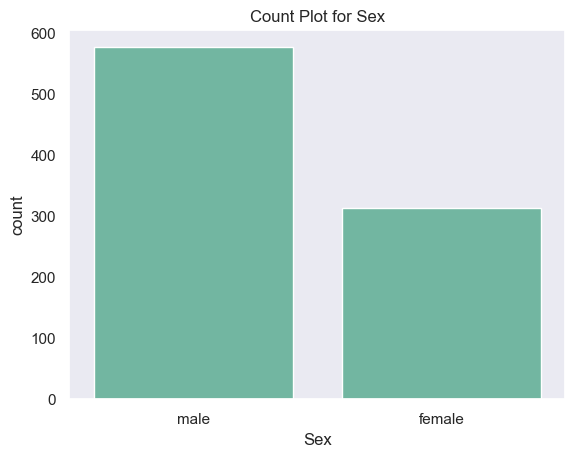

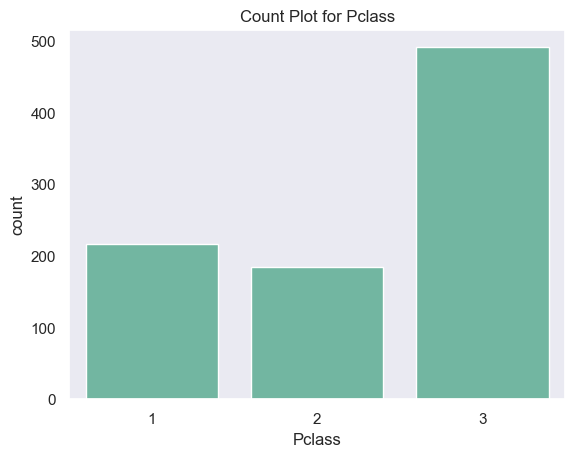

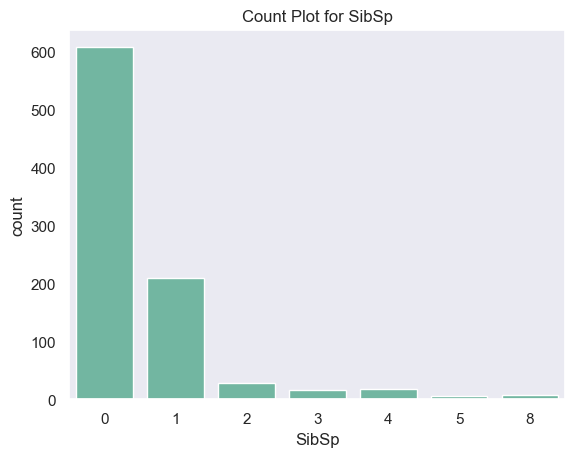

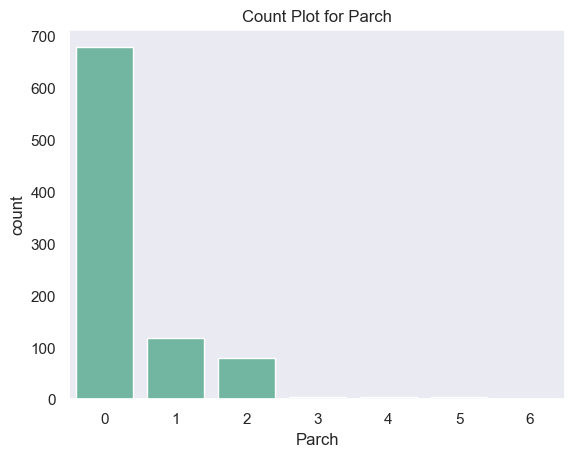

In [7]:
for category in ["Sex", "Pclass", "SibSp", "Parch"]:
    plt.figure()
    sns.countplot(data=titanic, x=category)
    plt.title(f"Count Plot for {category}")
    plt.show()

<Axes: >

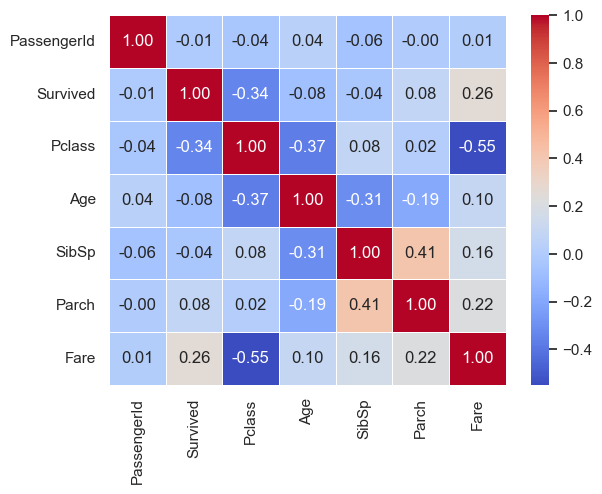

In [8]:
sns.heatmap(
    data=titanic.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
)

In [9]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<Axes: xlabel='FamilySize', ylabel='count'>

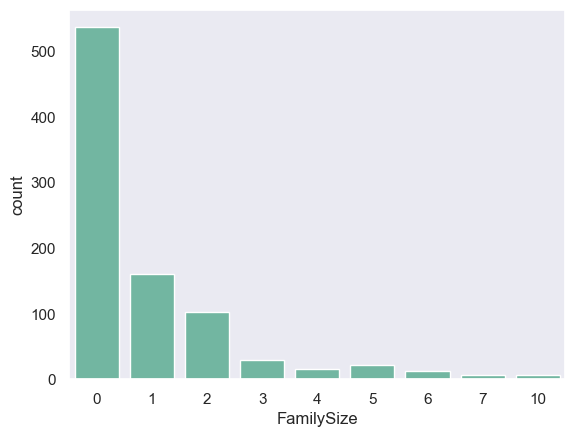

In [10]:
sns.countplot(data=titanic, x="FamilySize")

### Findings

1. A lot of singles existed on the ship
2. Some had family vacations planned out on it

#### Why Family Size Calculated

The columns `SibSp` and `Parch`, simply share if the person has family or not, in two different columns, merging them provides a better result


<Axes: xlabel='Title', ylabel='count'>

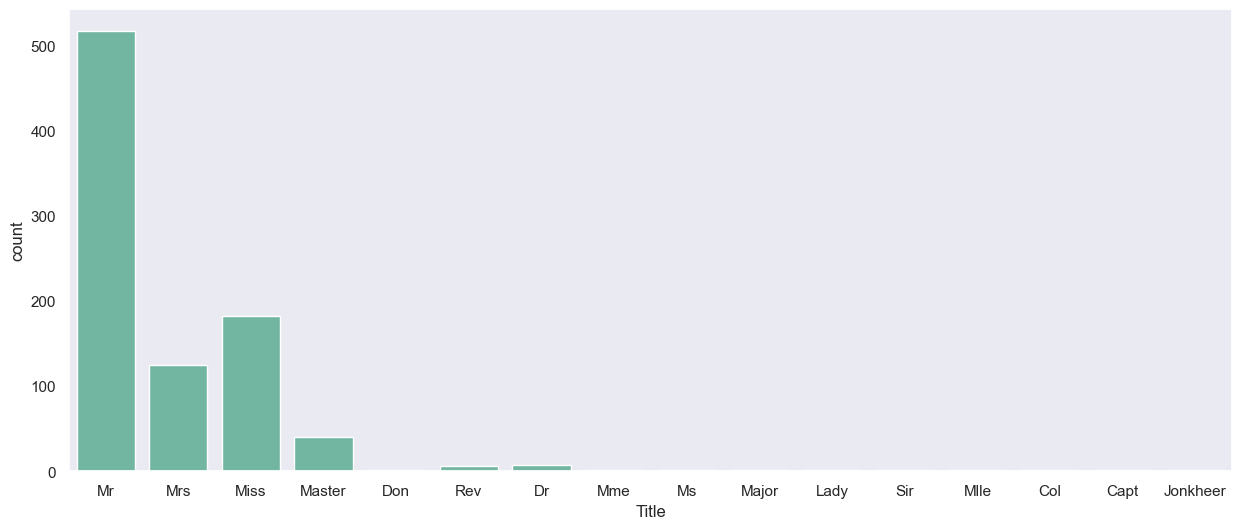

In [11]:
titanic["Title"] = titanic["Name"].str.extract(r", ([A-Za-z]+)\.")

plt.figure(figsize=(15, 6))
sns.countplot(data=titanic, x="Title")

### Findings

1. The data coincides with the Male centric-ness of the ship
